In [ ]:
import time
import pandas as pd
from selenium import webdriver as wd
from tqdm.notebook import tqdm
import re

In [53]:
#options=wd.ChromeOptions()
#options.add_argument('headless')
driver=wd.Chrome("C:/chromedriver")#,options=options)

url="https://www.melon.com/"
driver.get(url)
time.sleep(1)

song=[]
singer=[]
imagess=[]

login1=driver.find_element_by_css_selector("#gnbLoginDiv > div > button").click()
login2=driver.find_element_by_css_selector("#conts_section > div > div > div:nth-child(2) > button").click()

inputid=driver.find_element_by_css_selector("#id").send_keys("tjdcodnjs0103")
inputpw=driver.find_element_by_css_selector("#pwd").send_keys("!scw6799")
loginbtn=driver.find_element_by_css_selector("#btnLogin").click()
time.sleep(0.5)

chart=driver.find_element_by_css_selector("#gnb_menu > ul:nth-child(1) > li.nth1 > a > span.menu_bg.menu01").click()
time.sleep(1)

for i in range(1,101):
    songs=driver.find_elements_by_css_selector("#frm > div > table > tbody > tr:nth-child("+str(i)+") > td:nth-child(4) > div > div > div.ellipsis.rank01 > span > a")
    singers=driver.find_elements_by_css_selector("#frm > div > table > tbody > tr:nth-child("+str(i)+") > td:nth-child(4) > div > div > div.ellipsis.rank02 > a:nth-child(1)")
    images=driver.find_elements_by_css_selector("#frm > div > table > tbody > tr:nth-child("+str(i)+") > td:nth-child(2) > div > a > img")
    
    for i in songs:
        song.append(i.text)
    for i in singers:
        singer.append(i.text)
    for i in images:
        imagess.append(i.get_attribute('src'))    


In [67]:
from PIL import Image
import requests
from io import BytesIO
# request.get 요청
res = requests.get(url)
import pandas as pd

# 이미지 다운로드 시간 체크
image1 = []

#Img open
for img in imagess:
    # request.get 요청
    res = requests.get(img)

    # 이미지 다운로드 시간 체크


    #Img open
    img = Image.open(BytesIO(res.content))
    image1.append(img)
    
df = pd.DataFrame({'no' : list(range(100)), 'image' : image1})


   no                                              image
0   0  <PIL.JpegImagePlugin.JpegImageFile image mode=...
1   1  <PIL.JpegImagePlugin.JpegImageFile image mode=...
2   2  <PIL.JpegImagePlugin.JpegImageFile image mode=...
3   3  <PIL.JpegImagePlugin.JpegImageFile image mode=...
4   4  <PIL.JpegImagePlugin.JpegImageFile image mode=...


In [69]:
df

,no,image
0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,3,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,4,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...
95,95,<PIL.JpegImagePlugin.JpegImageFile image mode=...
96,96,<PIL.JpegImagePlugin.JpegImageFile image mode=...
97,97,<PIL.JpegImagePlugin.JpegImageFile image mode=...
98,98,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [71]:
imagess

['https://cdnimg.melon.co.kr/cm2/album/images/104/62/799/10462799_20200717150822_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm2/album/images/104/52/351/10452351_20200629152036_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm2/album/images/104/51/566/10451566_20200626114914_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm2/album/images/104/67/129/10467129_20200724181802_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm2/album/images/104/53/701/10453701_20200701151802_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm2/album/images/104/59/197/10459197_20200720141408_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm/album/images/101/17/789/10117789_500.jpg/melon/resize/120/quality/80/optimize',
 'https://cdnimg.melon.co.kr/cm2/album/images/104/26/648/10426648_20200506153340_500.jpg/melon/resize/120/quality/80/opt

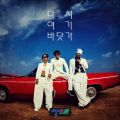

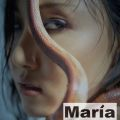

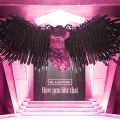

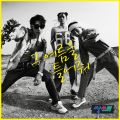

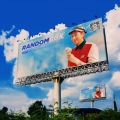

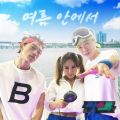

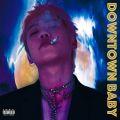

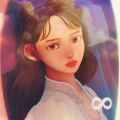

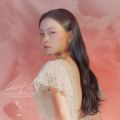

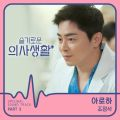

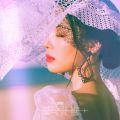

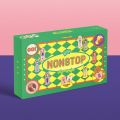

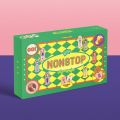

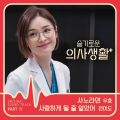

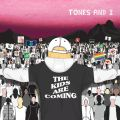

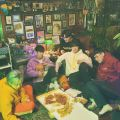

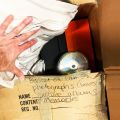

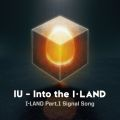

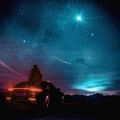

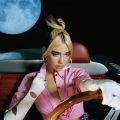

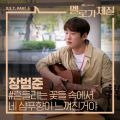

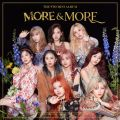

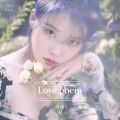

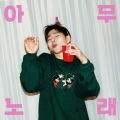

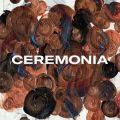

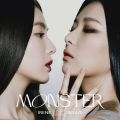

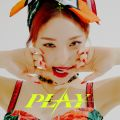

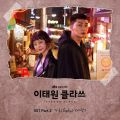

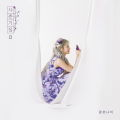

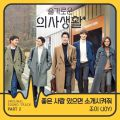

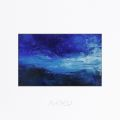

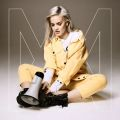

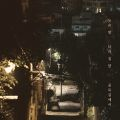

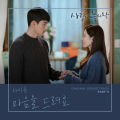

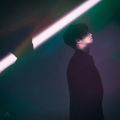

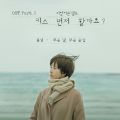

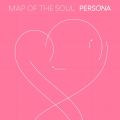

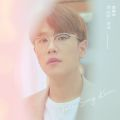

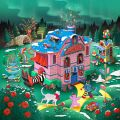

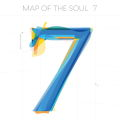

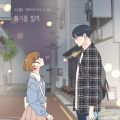

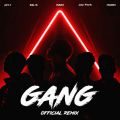

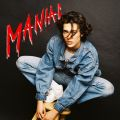

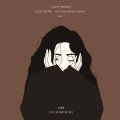

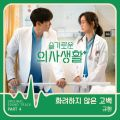

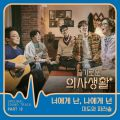

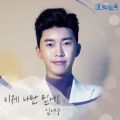

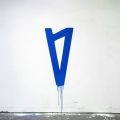

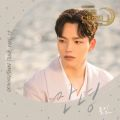

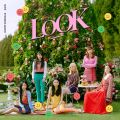

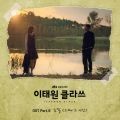

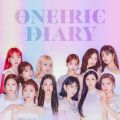

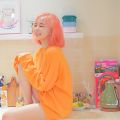

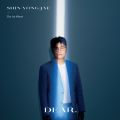

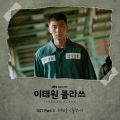

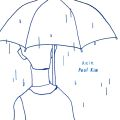

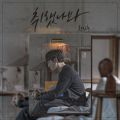

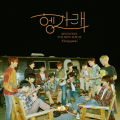

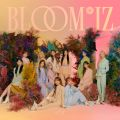

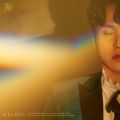

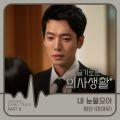

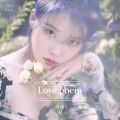

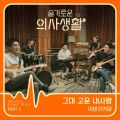

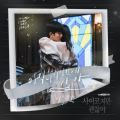

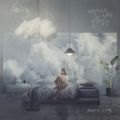

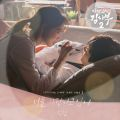

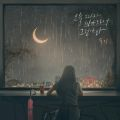

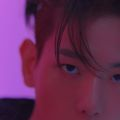

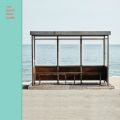

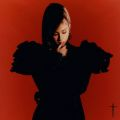

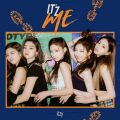

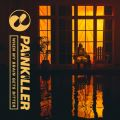

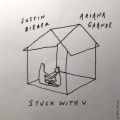

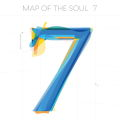

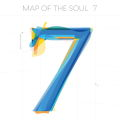

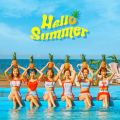

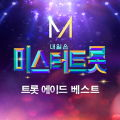

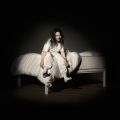

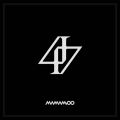

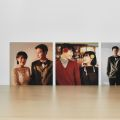

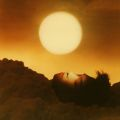

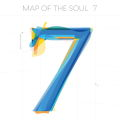

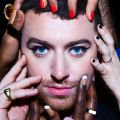

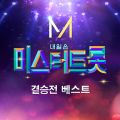

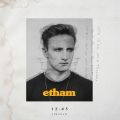

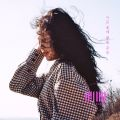

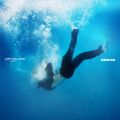

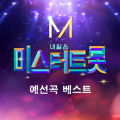

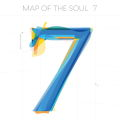

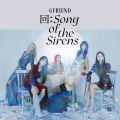

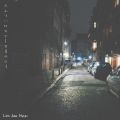

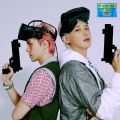

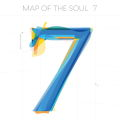

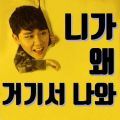

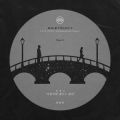

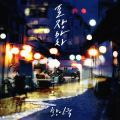

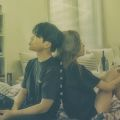

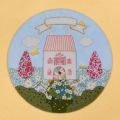

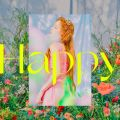

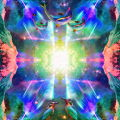

In [70]:
from PIL import Image
import requests
from io import BytesIO
# request.get 요청
res = requests.get(url)
import pandas as pd

# 이미지 다운로드 시간 체크
image1 = []

#Img open
for img in imagess:
    # request.get 요청
    res = requests.get(img)
    # 이미지 다운로드 시간 체크
    #Img open
    img = Image.open(BytesIO(res.content))
    display(img)

In [63]:
data=pd.DataFrame([song, singer, image])

In [64]:
data=data.T #데이터 정렬(행,열 치환-원래는 가로로 쭉->위아래로 나오게 정렬)

In [65]:
data.columns=(['song', 'singer', 'image']) #열 이름 바꿔주기

In [66]:
data

,song,singer,image
0,다시 여기 바닷가,"싹쓰리 (유두래곤, 린다G, 비룡)",https://cdnimg.melon.co.kr/cm2/album/images/10...
1,마리아 (Maria),화사 (Hwa Sa),https://cdnimg.melon.co.kr/cm2/album/images/10...
2,How You Like That,BLACKPINK,https://cdnimg.melon.co.kr/cm2/album/images/10...
3,그 여름을 틀어줘,"싹쓰리 (유두래곤, 린다G, 비룡)",https://cdnimg.melon.co.kr/cm2/album/images/10...
4,Summer Hate (Feat. 비),지코 (ZICO),https://cdnimg.melon.co.kr/cm2/album/images/10...
...,...,...,...
95,사랑이란 멜로는 없어,전상근,https://cdnimg.melon.co.kr/cm2/album/images/10...
96,포장마차,황인욱,https://cdnimg.melon.co.kr/cm/album/images/102...
97,우리 만남이,폴킴,https://cdnimg.melon.co.kr/cm2/album/images/10...
98,너를 그린 우주 (Insomnia2020) (Feat. 이라온),마크툽 (MAKTUB),https://cdnimg.melon.co.kr/cm2/album/images/10...


In [46]:
import time
import pandas as pd
from selenium import webdriver as wd
from tqdm.notebook import tqdm
import re

driver=wd.Chrome("C:/chromedriver")
url='https://store.musinsa.com/app/'

driver.get(url)
time.sleep(1)

driver.find_element_by_css_selector("#search_query").send_keys("반팔")
driver.find_element_by_css_selector("#search_form > span.search-btn.btn.ui-head-search-btn").click()
time.sleep(5)

brand=[]
name=[]
price=[]
star=[]
num=[]
image=[]

for i in range(1,51):
    brands=driver.find_elements_by_css_selector("#searchList > li:nth-child("+str(i)+") > div.li_inner > div.article_info > p.item_title > a")
    names=driver.find_elements_by_css_selector("#searchList > li:nth-child("+str(i)+") > div.li_inner > div.article_info > p.list_info > a")
    prices=driver.find_elements_by_css_selector("#searchList > li:nth-child("+str(i)+") > div.li_inner > div.article_info > p.price")
    stars=driver.find_elements_by_css_selector("#searchList > li:nth-child("+str(i)+") > div.li_inner > div.article_info > p.point > span.img-score")
    nums=driver.find_elements_by_css_selector("#searchList > li:nth-child("+str(i)+") > div.li_inner > div.article_info > p.point > span.count")
    images=driver.find_elements_by_css_selector("#searchList > li:nth-child("+str(i)+") > div.li_inner > div.list_img > a > img")

    for b in brands:
        brand.append(b.text)
    for n in names:
        name.append(n.text)
    for p in prices:
        price.append(re.sub("[,]","",p.text[-7:-1]))
    price=list(map(int,price))
    for s in stars:
        star.append(s.get_attribute("class")[-2:])
    star=list(map(int,star))
    for nu in nums:
        num.append(nu.text)
    for im in images:
        image.append(im.get_attribute("src"))
        
print(brand,"\n\n",name,"\n\n",price,"\n\n",star,"\n\n",num,"\n\n",image)

print(len(brand))
print(len(name))
print(len(price))
print(len(star))
print(len(num))
print(len(image))

musinsa=pd.DataFrame([brand,name,price, star,num,image])
musinsa=musinsa.T
musinsa.columns=['brand','name','price', 'star','num','image']
musinsa

['마크 곤잘레스', '마크 곤잘레스', '아노블리어', '엘엠씨', '커버낫', '엘엠씨', '쿠어', '디스이즈네버댓', '티떠블유엔', '디스이즈네버댓', '쿠어', '아노블리어', '아노블리어', '비바스튜디오', '쿠어', '마크 곤잘레스', '디스이즈네버댓', '파르티멘토', '커버낫', '마크 곤잘레스', '내셔널지오그래픽', '꼼파뇨', '라퍼지스토어', '리', '칼하트', '커버낫', '랩12', '커버낫', '아노블리어', '커버낫', '비바스튜디오', '마크 곤잘레스', '마크 곤잘레스', '그루브라임', '유니스디자인', '니티드', '커버낫', '무신사 스탠다드', '리', '디스이즈네버댓', '커버낫', '꼼파뇨', '꼼파뇨', '휠라', '디스이즈네버댓', '로맨틱 파이어리츠', '커버낫', '라퍼지스토어', '무신사 스탠다드', '디스이즈네버댓'] 

 ['M/G SIGN LOGO T-SHIRTS WHITE', 'M/G SIGN LOGO T-SHIRTS NAVY', '루즈핏 오픈카라 텐셀 린넨 셔츠 [네이비]', '7/30 배송 LMC THREE BEARS TEE white', 'S/S AUTHENTIC LOGO TEE WHITE', 'LMC 5th ANNIV RETRO MOON TEE black', '기자 코튼 스판 세미오버핏 티셔츠 (화이트)', 'DSN-Logo Tee White', '[패키지]아이스버그 반팔 STST3279 + 스플래쉬 반팔 STST3278', 'T-Logo Tee White (001)', '기자 CP 스판 세미오버핏 티셔츠 (스카이블루)', '루즈핏 오픈카라 텐셀 린넨 셔츠 [오트밀]', '루즈핏 오픈카라 텐셀 린넨 셔츠 [블랙]', '8/3 배송 LOCATION SHORT SLEEVE JS [BLACK]', '기자 CP 스판 세미오버핏 티셔츠 (헤이즐넛)', 'M/G SMALL SIGN LOGO T-SHIRTS BLACK', 'T-Logo Tee Black (001)', '[패키지][CHUBBY]EMBR

,brand,name,price,star,num,image
0,마크 곤잘레스,M/G SIGN LOGO T-SHIRTS WHITE,24500,45,"2,442",https://image.msscdn.net/images/goods_img/2019...
1,마크 곤잘레스,M/G SIGN LOGO T-SHIRTS NAVY,24500,45,641,https://image.msscdn.net/images/goods_img/2019...
2,아노블리어,루즈핏 오픈카라 텐셀 린넨 셔츠 [네이비],39000,45,"1,798",https://image.msscdn.net/images/goods_img/2019...
3,엘엠씨,7/30 배송 LMC THREE BEARS TEE white,27300,45,"1,441",https://image.msscdn.net/images/no_image_125.png
4,커버낫,S/S AUTHENTIC LOGO TEE WHITE,23400,45,"8,127",https://image.msscdn.net/images/no_image_125.png
5,엘엠씨,LMC 5th ANNIV RETRO MOON TEE black,27300,45,"2,765",https://image.msscdn.net/images/goods_img/2020...
6,쿠어,기자 코튼 스판 세미오버핏 티셔츠 (화이트),31500,45,99,https://image.msscdn.net/images/goods_img/2020...
7,디스이즈네버댓,DSN-Logo Tee White,27300,45,"2,100",https://image.msscdn.net/images/goods_img/2020...
8,티떠블유엔,[패키지]아이스버그 반팔 STST3279 + 스플래쉬 반팔 STST3278,39800,45,"2,969",https://image.msscdn.net/images/no_image_125.png
9,디스이즈네버댓,T-Logo Tee White (001),31200,45,140,https://image.msscdn.net/images/no_image_125.png


In [47]:
image

['https://image.msscdn.net/images/goods_img/20190404/1005680/1005680_4_125.jpg',
 'https://image.msscdn.net/images/goods_img/20190404/1005689/1005689_3_125.jpg',
 'https://image.msscdn.net/images/goods_img/20190408/1008043/1008043_2_125.jpg',
 'https://image.msscdn.net/images/no_image_125.png',
 'https://image.msscdn.net/images/no_image_125.png',
 'https://image.msscdn.net/images/goods_img/20200414/1404746/1404746_1_125.jpg',
 'https://image.msscdn.net/images/goods_img/20200407/1388137/1388137_1_125.jpg',
 'https://image.msscdn.net/images/goods_img/20200219/1311681/1311681_2_125.jpg',
 'https://image.msscdn.net/images/no_image_125.png',
 'https://image.msscdn.net/images/no_image_125.png',
 'https://image.msscdn.net/images/goods_img/20200407/1388232/1388232_1_125.jpg',
 'https://image.msscdn.net/images/goods_img/20190408/1008039/1008039_2_125.jpg',
 'https://image.msscdn.net/images/goods_img/20190610/1067420/1067420_1_125.jpg',
 'https://image.msscdn.net/images/no_image_125.png',
 'http

In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


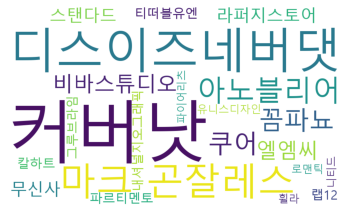

In [43]:
brand2=' '.join(brand)
brand2

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc=WordCloud(font_path=r'c:\Windows\Fonts\malgun.ttf', \
             background_color="white", \
             width=1000, \
             height=600, \
             max_words=100, \
             max_font_size=200, \
             random_state=0)
plt.imshow(wc.generate(brand2))
plt.axis("off")
plt.show()